# Stock STARR Ratio Chart

https://www.franklintempleton.com/content-us/pdf/en-us/en-us-retail/active-views/PCT_TPSTR_0817.pdf

### STARR = (Rp - Rf) / ETL(%)
### Stable Tail-Adjusted Return Ratio
### ETL - Expected Tail Loss  

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2016-01-01' #input
end = '2020-07-01' #input
symbol = 'AMD' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
stock_returns = stocks['Adj Close'].pct_change().dropna()

In [5]:
# risk free
rf = yf.download('BIL', start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [6]:
def starr_ratio(stock_returns, rf):
    etl = -0.10 # 99% confidence 
    sr = (stock_returns - rf) / etl
    return sr

Text(0, 0.5, 'STARR')

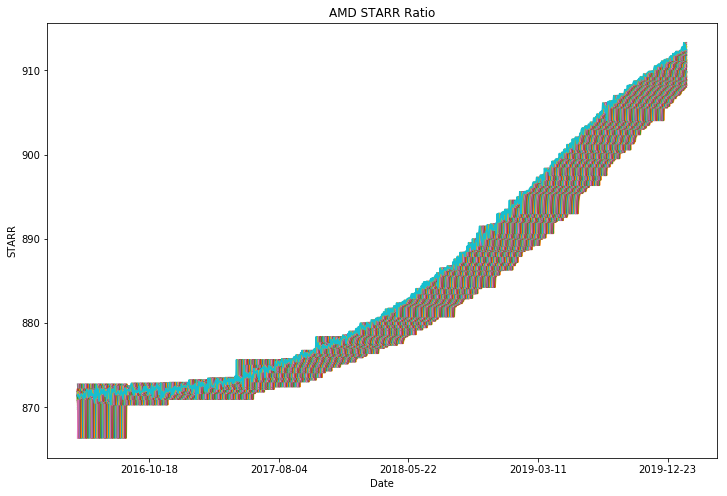

In [7]:
# Compute the running Alpha
running = [starr_ratio(stock_returns[i-90:i], rf[i-90:i]) for i in range(90, len(stock_returns))]


# Plot running Alpha up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stock_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' STARR Ratio')
plt.xlabel('Date')
plt.ylabel('STARR')

In [8]:
starr_ratio(stock_returns, rf)

Date
2016-01-04           NaN
2016-01-05    871.484098
2016-01-06    871.903306
2016-01-07    872.137419
2016-01-08    871.835119
2016-01-11    870.286506
2016-01-12    871.198220
2016-01-13    871.806859
2016-01-14    871.208356
2016-01-15    871.845059
2016-01-19    871.615173
2016-01-20    871.990316
2016-01-21    869.800785
2016-01-22    871.365507
2016-01-25    870.726036
2016-01-26    871.266427
2016-01-27    870.931229
2016-01-28    871.455827
2016-01-29    870.834972
2016-02-01    871.303306
2016-02-02    871.731514
2016-02-03    870.819075
2016-02-04    871.315277
2016-02-05    871.938211
2016-02-08    871.473610
2016-02-09    871.567336
2016-02-10    871.536874
2016-02-11    871.303200
2016-02-12    871.382375
2016-02-16    871.221085
                 ...    
2020-05-19    915.138786
2020-05-20    915.134133
2020-05-21    915.708574
2020-05-22    915.204837
2020-05-26    915.758900
2020-05-27    915.384590
2020-05-28    915.489597
2020-05-29    914.901844
2020-06-01    915.43

In [9]:
sr = starr_ratio(stock_returns, rf)

Text(0, 0.5, 'STARR Ratio')

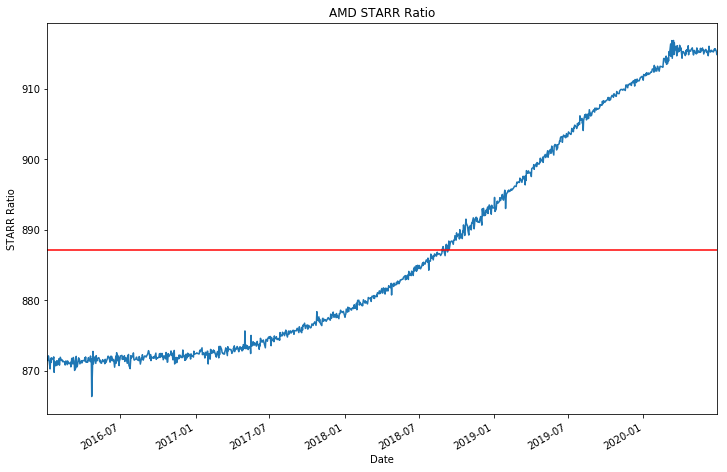

In [10]:
sr.plot(figsize=(12,8), title = symbol + ' STARR Ratio')
plt.axhline(y=sr.mean(), color='r', linestyle='-')
plt.xlabel('Date')
plt.ylabel('STARR Ratio')